In [1]:
import pandas as pd
import cv2
import numpy as np
from sklearn.utils import shuffle
import os
from collections import deque
import copy
import matplotlib
import matplotlib.pyplot as plt
from keras.utils import np_utils
from config import Config
%matplotlib inline  

Using TensorFlow backend.


In [2]:
def file_generator(data_path,data_files,temporal_stride=1,temporal_length=16):
    '''
    data_files - list of csv files to be read.
    '''
    for f in data_files:       
        tmp_df = pd.read_csv(os.path.join(data_path,f))
        label_list = list(tmp_df['Label'])
        total_images = len(label_list) 
        if total_images>=temporal_length:
            num_samples = int((total_images-temporal_length)/temporal_stride)+1
            print ('num of samples from vid seq-{}: {}'.format(f,num_samples))
            img_list = list(tmp_df['FileName'])
        else:
            print ('num of frames is less than temporal length; hence discarding this file-{}'.format(f))
            continue

        start_frame = 0
        samples = deque()
        samp_count=0
        for img in img_list:
            samples.append(img)
            if len(samples)==temporal_length:
                samples_c=copy.deepcopy(samples)
                samp_count+=1
                for t in range(temporal_stride):
                    samples.popleft()
                yield samples_c,label_list[0]

In [3]:
def load_samples(data_cat='train',temporal_stride=1,temporal_length=16):
    data_path = os.path.join('data_files',data_cat)
    data_files = os.listdir(data_path)
    file_gen = file_generator(data_path,data_files,temporal_stride,temporal_length)
    iterator = True
    data_list = []
    while iterator:
        try:
            x,y = next(file_gen)
            x=list(x)
            data_list.append([x,y])
        except Exception as e:
            print ('the exception: ',e)
            iterator = False
            print ('end of data generator')
    return data_list


In [4]:
train_data = load_samples(data_cat='train',temporal_stride=4,temporal_length=16)

num of samples from vid seq-Archery_v_Archery_g01_c01.csv: 29
num of samples from vid seq-Archery_v_Archery_g01_c02.csv: 32
num of samples from vid seq-Archery_v_Archery_g01_c03.csv: 36
num of samples from vid seq-Archery_v_Archery_g01_c04.csv: 28
num of samples from vid seq-Archery_v_Archery_g01_c05.csv: 30
num of samples from vid seq-Archery_v_Archery_g01_c06.csv: 24
num of samples from vid seq-Archery_v_Archery_g01_c07.csv: 32
num of samples from vid seq-Archery_v_Archery_g02_c01.csv: 36
num of samples from vid seq-Archery_v_Archery_g02_c02.csv: 37
num of samples from vid seq-Archery_v_Archery_g02_c03.csv: 31
num of samples from vid seq-Archery_v_Archery_g02_c04.csv: 24
num of samples from vid seq-Archery_v_Archery_g02_c05.csv: 28
num of samples from vid seq-Archery_v_Archery_g02_c06.csv: 25
num of samples from vid seq-Archery_v_Archery_g02_c07.csv: 38
num of samples from vid seq-Archery_v_Archery_g03_c01.csv: 34
num of samples from vid seq-Archery_v_Archery_g03_c02.csv: 41
num of s

num of samples from vid seq-Basketball_v_Basketball_g06_c04.csv: 16
num of samples from vid seq-Basketball_v_Basketball_g07_c01.csv: 32
num of samples from vid seq-Basketball_v_Basketball_g07_c02.csv: 22
num of samples from vid seq-Basketball_v_Basketball_g07_c03.csv: 34
num of samples from vid seq-Basketball_v_Basketball_g07_c04.csv: 22
num of samples from vid seq-Basketball_v_Basketball_g08_c01.csv: 39
num of samples from vid seq-Basketball_v_Basketball_g08_c02.csv: 18
num of samples from vid seq-Basketball_v_Basketball_g08_c03.csv: 21
num of samples from vid seq-Basketball_v_Basketball_g08_c04.csv: 22
num of samples from vid seq-Basketball_v_Basketball_g09_c01.csv: 24
num of samples from vid seq-Basketball_v_Basketball_g09_c02.csv: 23
num of samples from vid seq-Basketball_v_Basketball_g09_c03.csv: 18
num of samples from vid seq-Basketball_v_Basketball_g09_c04.csv: 22
num of samples from vid seq-Basketball_v_Basketball_g09_c05.csv: 27
num of samples from vid seq-Basketball_v_Basketb

num of samples from vid seq-Biking_v_Biking_g05_c02.csv: 47
num of samples from vid seq-Biking_v_Biking_g05_c03.csv: 47
num of samples from vid seq-Biking_v_Biking_g05_c04.csv: 47
num of samples from vid seq-Biking_v_Biking_g05_c05.csv: 37
num of samples from vid seq-Biking_v_Biking_g05_c06.csv: 42
num of samples from vid seq-Biking_v_Biking_g05_c07.csv: 42
num of samples from vid seq-Biking_v_Biking_g06_c01.csv: 22
num of samples from vid seq-Biking_v_Biking_g06_c02.csv: 36
num of samples from vid seq-Biking_v_Biking_g06_c03.csv: 47
num of samples from vid seq-Biking_v_Biking_g06_c04.csv: 55
num of samples from vid seq-Biking_v_Biking_g06_c05.csv: 47
num of samples from vid seq-Biking_v_Biking_g07_c01.csv: 72
num of samples from vid seq-Biking_v_Biking_g07_c02.csv: 87
num of samples from vid seq-Biking_v_Biking_g07_c03.csv: 97
num of samples from vid seq-Biking_v_Biking_g07_c04.csv: 71
num of samples from vid seq-Biking_v_Biking_g07_c05.csv: 45
num of samples from vid seq-Biking_v_Bik

In [5]:
print ('Total number of train samples:',len(train_data))

Total number of train samples: 12277


In [6]:
train_data[0]

[['activity_data\\train\\Archery\\v_Archery_g01_c01\\img_000000.png',
  'activity_data\\train\\Archery\\v_Archery_g01_c01\\img_000001.png',
  'activity_data\\train\\Archery\\v_Archery_g01_c01\\img_000002.png',
  'activity_data\\train\\Archery\\v_Archery_g01_c01\\img_000003.png',
  'activity_data\\train\\Archery\\v_Archery_g01_c01\\img_000004.png',
  'activity_data\\train\\Archery\\v_Archery_g01_c01\\img_000005.png',
  'activity_data\\train\\Archery\\v_Archery_g01_c01\\img_000006.png',
  'activity_data\\train\\Archery\\v_Archery_g01_c01\\img_000007.png',
  'activity_data\\train\\Archery\\v_Archery_g01_c01\\img_000008.png',
  'activity_data\\train\\Archery\\v_Archery_g01_c01\\img_000009.png',
  'activity_data\\train\\Archery\\v_Archery_g01_c01\\img_000010.png',
  'activity_data\\train\\Archery\\v_Archery_g01_c01\\img_000011.png',
  'activity_data\\train\\Archery\\v_Archery_g01_c01\\img_000012.png',
  'activity_data\\train\\Archery\\v_Archery_g01_c01\\img_000013.png',
  'activity_data\\tr

In [7]:
test_data = load_samples(data_cat='test',temporal_stride=4)

num of samples from vid seq-Archery_v_Archery_g18_c03.csv: 46
num of samples from vid seq-Archery_v_Archery_g18_c04.csv: 39
num of samples from vid seq-Archery_v_Archery_g18_c05.csv: 35
num of samples from vid seq-Archery_v_Archery_g18_c06.csv: 37
num of samples from vid seq-Archery_v_Archery_g18_c07.csv: 32
num of samples from vid seq-Archery_v_Archery_g19_c01.csv: 29
num of samples from vid seq-Archery_v_Archery_g19_c02.csv: 19
num of samples from vid seq-Archery_v_Archery_g19_c03.csv: 36
num of samples from vid seq-Archery_v_Archery_g19_c04.csv: 20
num of samples from vid seq-Archery_v_Archery_g20_c01.csv: 19
num of samples from vid seq-Archery_v_Archery_g20_c02.csv: 18
num of samples from vid seq-Archery_v_Archery_g20_c03.csv: 20
num of samples from vid seq-Archery_v_Archery_g20_c04.csv: 21
num of samples from vid seq-Archery_v_Archery_g20_c05.csv: 27
num of samples from vid seq-Archery_v_Archery_g20_c06.csv: 26
num of samples from vid seq-Archery_v_Archery_g20_c07.csv: 21
num of s

In [8]:
len(test_data)

4472

In [9]:
def shuffle_data(samples):
    data = shuffle(samples,random_state=2)
    return data

In [ ]:
def preprocess_image(img):
    img = cv2.resize(img,(224,224))
    img = img/255
    return img

In [10]:
def data_generator(data,batch_size=10,temporal_padding='same',shuffle=True):              
    """
    Yields the next training batch.
    data is an array [[img1_filename,img2_filename...,img16_filename],label1], [image2_filename,label2],...].
    """
    num_samples = len(data)
    if shuffle:
        data = shuffle_data(data)
    while True:   
        for offset in range(0, num_samples, batch_size):
            print ('startring index: ', offset) 
            # Get the samples you'll use in this batch
            batch_samples = data[offset:offset+batch_size]
            # Initialise X_train and y_train arrays for this batch
            X_train = []
            y_train = []
            # For each example
            for batch_sample in batch_samples:
                # Load image (X)
                x = batch_sample[0]
                y = batch_sample[1]
                temp_data_list = []
                for img in x:
                    try:
                        img = cv2.imread(img)
                        #apply any kind of preprocessing here
                        #img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
                        img = preprocess_img(img)
                        temp_data_list.append(img)

                    except Exception as e:
                        print (e)
                        print ('error reading file: ',img)                      
                # Read label (y)
                #label = label_names[y]
                # Add example to arrays
                X_train.append(temp_data_list)
                y_train.append(y)
    
            # Make sure they're numpy arrays (as opposed to lists)
            X_train = np.array(X_train)
            #X_train = np.rollaxis(X_train,1,4)
            y_train = np.array(y_train)
            # convert to one hot encoding for training keras model
            y_train = np_utils.to_categorical(y_train, 3)
    
            # yield the next training batch            
            yield X_train, y_train

#### create a generator object with training data

In [11]:
train_generator = data_generator(train_data,batch_size=2,shuffle=True)
    

In [12]:
x,y = next(train_generator)
print ('x shape: ',x.shape)
print ('y shape: ',y.shape)

startring index:  0
x shape:  (2, 16, 224, 224, 3)
y shape:  (2, 3)


#### Let's visualize the first sample

In [13]:
x_0=x[0]
y_0=y[0]
print('x_0 shape: ',x_0.shape)
print('y_0 shape: ',y_0.shape)

x_0 shape:  (16, 224, 224, 3)
y_0 shape:  (3,)


In [14]:
Config.labels_to_class

{0: 'Archery', 1: 'Basketball', 2: 'Biking'}

In [15]:
activity = Config.labels_to_class[np.argmax(y_0)]
activity

'Biking'

#### Plot the first sample

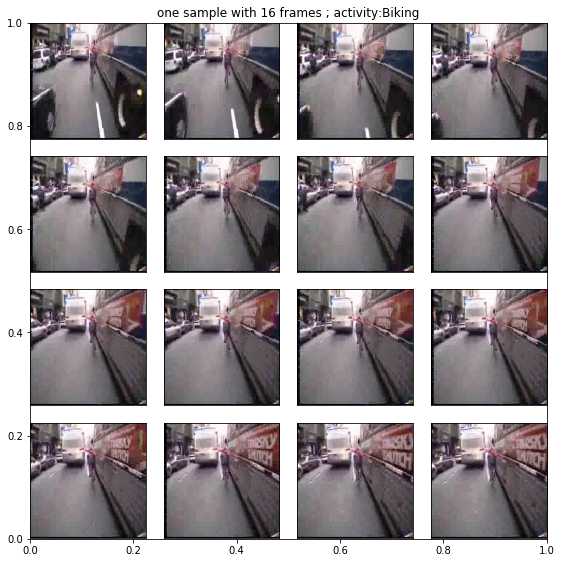

In [19]:
num_of_images=16
fig=plt.figure(figsize=(8,8))	
plt.title("one sample with {} frames ; activity:{}".format(num_of_images,activity))
subplot_num = int(np.ceil(np.sqrt(num_of_images)))
for i in range(int(num_of_images)):
    ax = fig.add_subplot(subplot_num, subplot_num, i+1)
    #ax.imshow(output_image[0,:,:,i],interpolation='nearest' ) #to see the first filter
    ax.imshow(x_0[i,:,:,::-1])
    plt.xticks([])
    plt.yticks([])
    plt.tight_layout()
plt.show()
